# Iris petals
This is a popular dataset readily available in the UCI Machine Learning Data Repository. In this project, I will be using Machine Learning techniques to predict the Iris petal species - Setosa, Versicolour and Virginica.

---

## Table of contents

* [Pre-requisites](#import)
* [Data Cleaning](#data)
* [Data Visualization](#visualize)
* [Data Modeling](#model)
* [Observations](#conclude)
* [Useful Resources](#resources)

---



### Pre-requisites  <a name="import"></a>

In [1]:
# Import Libraries - prior to any data analysis
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization

In [2]:
# Load dataset from Scikit library
from sklearn.datasets import load_iris

# save load_iris() sklearn dataset to iris
# if you'd like to check dataset type use: type(load_iris())
# if you'd like to view list of attributes use: dir(load_iris())
iris = load_iris()

In [3]:
type(load_iris())

sklearn.utils.Bunch

In [4]:
dir(load_iris())

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [5]:
print("Filename: ",iris.filename)
iris.keys()

Filename:  /Users/KT/opt/anaconda3/lib/python3.7/site-packages/sklearn/datasets/data/iris.csv


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
iris_pd = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Link the target category name with the respective category
iris_pd['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Drop the target variable with 0,1,2 as the categories
iris_pd.drop('target', axis=1, inplace=True)

iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
iris_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
Species              150 non-null category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


## Dataset Details & Cleaning   <a name="data"></a>
From the below `iris.DESCR` code we have information on what this dataset contains:

- **150 rows of data**
- **4 Predictive attributes:**
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm       
- **1 Categorical target:**
    - Iris-Setosa
    - Iris-Versicolour
    - Iris-Virginica

In [8]:
iris.DESCR 
# detailed information on what the dataset contains, their descriptive statistics 
# and the source of the original file

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [9]:
# displays the number of rows and columns
print("Iris data: ",iris.data.shape)
print("Iris target: ",iris.target.shape)

Iris data:  (150, 4)
Iris target:  (150,)


In [10]:
# Names of the 4 attributes:
print("Attribute 1: ",iris.feature_names[0])
print("Attribute 2: ",iris.feature_names[1])
print("Attribute 3: ",iris.feature_names[2])
print("Attribute 4: ",iris.feature_names[3])

Attribute 1:  sepal length (cm)
Attribute 2:  sepal width (cm)
Attribute 3:  petal length (cm)
Attribute 4:  petal width (cm)


In [11]:
# Names of the 3 categories in target:
print("Category 1: ",iris.target_names[0])
print("Category 2: ",iris.target_names[1])
print("Category 3: ",iris.target_names[2])

Category 1:  setosa
Category 2:  versicolor
Category 3:  virginica


In [12]:
# the 4 predictive attributes are in a Numpy array:
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [13]:
# the target variable is a categorical field present in this array:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
# The format of the attributes:
iris.data.dtype

dtype('float64')

In [15]:
# The format of the target:
iris.target.dtype

dtype('int64')

## Data Visualization  <a name="visualize"></a>

### Question: What are the descriptive statistics results?

Since the 4 attributes are all numerical, the table seen below shows the mean, standard deviation, minimum, maximum, and all the inter-quartile ranges of the 4 attributes.

In [16]:
iris_pd.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Question: What is the distribution of each of the attributes?

The below histograms show a normal distribution in all 4 attributes. The normal, bell-shaped curve is more noticeable in sepal length, sepal width and petal length.

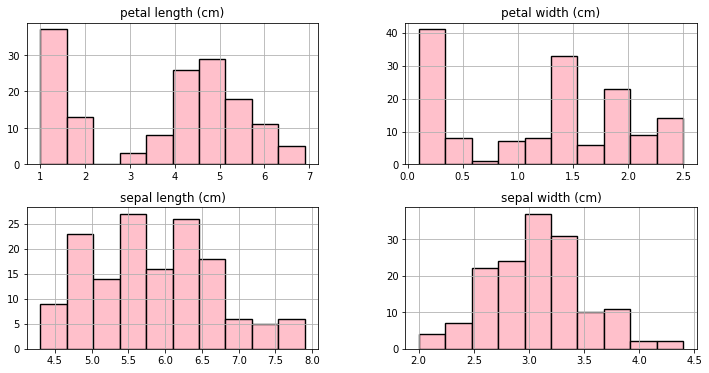

In [17]:
iris_pd[iris.feature_names].hist(edgecolor='black', linewidth=1.4, color='pink')
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

### Question: How scattered are the Sepal Length & Sepal Width?

The scatter plot shows that Iris setosa plants have a smaller sepal length and wider sepal width. Similarly, Iris versicolor have average sepal length and smaller sepal width; and Iris virginica have longer sepal legnth and smaller sepal width.

We can see a relationship between the 2 Sepal attributes here:

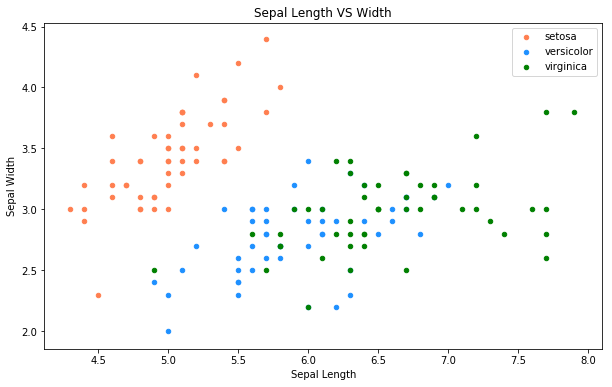

In [18]:
# Comparing Sepal Length and Sepal Width
fig = iris_pd[iris_pd.Species=='setosa'].plot(kind='scatter',x='sepal length (cm)',y='sepal width (cm)',color='coral', label='setosa')
iris_pd[iris_pd.Species=='versicolor'].plot(kind='scatter',x='sepal length (cm)',y='sepal width (cm)',color='dodgerblue', label='versicolor',ax=fig)
iris_pd[iris_pd.Species=='virginica'].plot(kind='scatter',x='sepal length (cm)',y='sepal width (cm)',color='green', label='virginica', ax=fig)

fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)

plt.show()

### Question: How scattered are the Petal Length & Petal Width?

As we can see that the Petal attributes are giving a better cluster division compared to the Sepal attributes. This is an indication that the Petals can help in better and accurate predictions over the Sepals. We will look into this later.

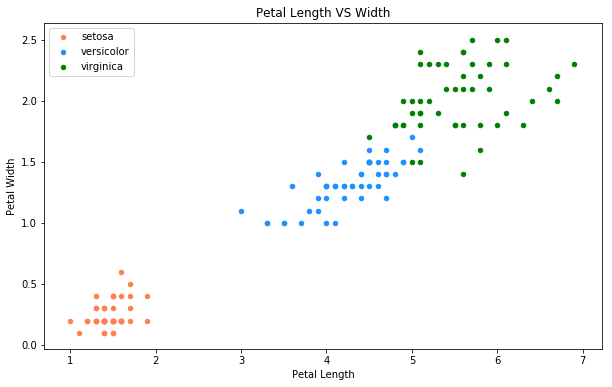

In [19]:
# Comparing Petal Length and Petal Width
fig = iris_pd[iris_pd.Species=='setosa'].plot(kind='scatter',x='petal length (cm)',y='petal width (cm)',color='coral', label='setosa')
iris_pd[iris_pd.Species=='versicolor'].plot(kind='scatter',x='petal length (cm)',y='petal width (cm)',color='dodgerblue', label='versicolor',ax=fig)
iris_pd[iris_pd.Species=='virginica'].plot(kind='scatter',x='petal length (cm)',y='petal width (cm)',color='green', label='virginica', ax=fig)

fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)

plt.show()

### Question: Do the length and width vary according to the species (setosa, versicolour, virginica)?

The violin plot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density.

#### Note: The colours used in above scatter plots have been kept consistent in below violin plots too.

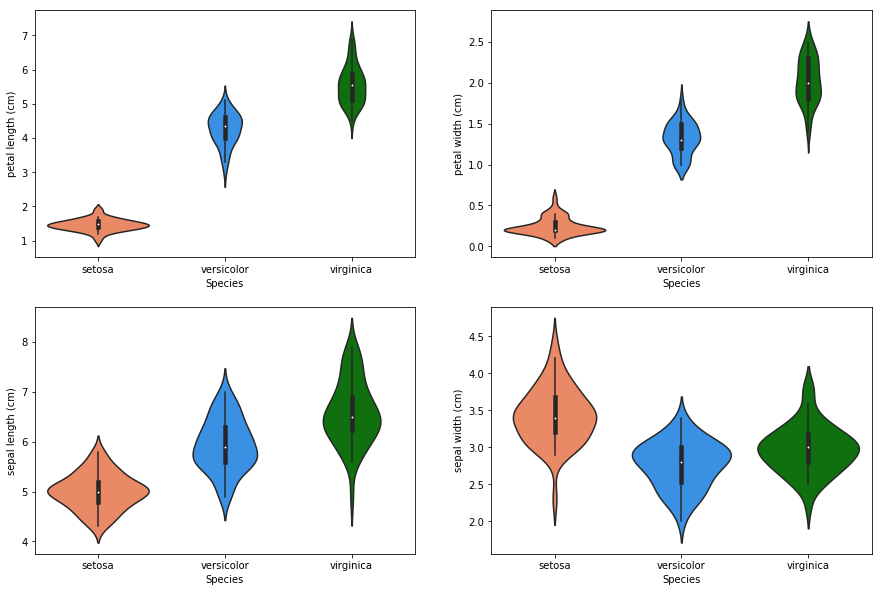

In [20]:
# Violin Plots of all 4 attributes against the Target species
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.violinplot(x='Species',y='petal length (cm)',data=iris_pd, palette=['coral','dodgerblue','green'])
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='petal width (cm)',data=iris_pd, palette=['coral','dodgerblue','green'])

plt.subplot(2,2,3)
sns.violinplot(x='Species',y='sepal length (cm)',data=iris_pd, palette=['coral','dodgerblue','green'])
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='sepal width (cm)',data=iris_pd, palette=['coral','dodgerblue','green'])

plt.show()


## Data Modeling  <a name="model"></a>

Since this is a classification problem, let's look at the various classification algorithms that can be used.

### _Note: Things to know before proceeding further..._
 - In Machine Learning, there are 2 types of algorithms: `Supervised` and `Unsurpervised` learning.
     - `Supervised Learning`: Using past data to predict the outcomes/targets
     - `Unsupervised Learning`: Outcome/target is not known
 - In this __Iris plant__ dataset, we are solving a Supervised Learning problem.
 - Within Supervised Learning, there are 2 types: `Classification` and `Regression` models.
     - `Classification`: When outcome/target is a categorical variable. Samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data.
     - `Regression`: When the outcome/target is a numerical/continuous variable. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.
 - In this __Iris plant__ dataset, the outcome/target variable is categorical. Hence I will be exploring various classification algorithms.
 - **Attributes:** An attribute is a property of an instance that may be used to determine its classification. In the following dataset, the attributes are the petal and sepal length and width. It is also known as **Features**.
 - **Target variable:** This is the variable that is or should be the output. Here the target variables are the 3 flower species (setosa, versicolor, virginica).

In [21]:
# Import Libraries
from sklearn.model_selection import train_test_split #to split the dataset for training and testing

from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

from sklearn import metrics #for checking the model accuracy
from sklearn.metrics import classification_report # for checking the model accuracy/performance

### Feature Selection & Correlation
While training an algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are **`highly correlated`**, then training an algorithm with all the featues will **_reduce_** the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.

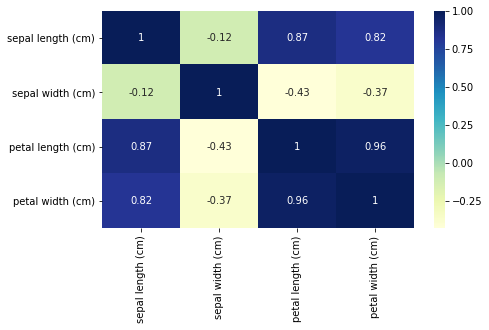

In [22]:
# Correlation HeatMap
plt.figure(figsize=(7,4))
sns.heatmap(iris_pd.corr(),annot=True,cmap="YlGnBu") 
#draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

**Heatmap explained:**

The Sepal Width and Length are **not** correlated The Petal Width and Length are **highly** correlated

- We will use all the features for training the algorithm and check the accuracy.

- Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy.

### Steps To Be followed When Applying an Algorithm

1) Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.

2) Select any algorithm based on the problem (`classification` or `regression`).

3) Then pass the training dataset to the algorithm to train it. We use the `.fit()` method

4) Then pass the testing data to the trained algorithm to predict the outcome. We use the `.predict()` method.

5) We then check the accuracy by passing the predicted outcome and the actual output to the model.

### Splitting The Data into Training And Testing Dataset

In [48]:
# 1) Split dataset into training and test sets
train, test = train_test_split(iris_pd, test_size = 0.3) #, random_state=0)
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
# random_state: Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls.

# Note: this is always a good idea to compare the number of rows and columns to the main dataset!
# 70% = 105 and 30% = 45, total = 150 (which matches the main dataset)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [49]:
train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
16,5.4,3.9,1.3,0.4,setosa
139,6.9,3.1,5.4,2.1,virginica
57,4.9,2.4,3.3,1.0,versicolor
119,6.0,2.2,5.0,1.5,virginica
51,6.4,3.2,4.5,1.5,versicolor


In [50]:
# Split the 4 attributes to be in 1 datafram separate from the target variable (species)
train_X = train[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']] # training data features
train_y = train[['Species']] # output of training data

test_X = test[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']] # taking test data features
test_y = test[['Species']] # output of test data

In [51]:
train_X.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
16,5.4,3.9,1.3,0.4
139,6.9,3.1,5.4,2.1
57,4.9,2.4,3.3,1.0


In [52]:
test_X.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
26,5.0,3.4,1.6,0.4
85,6.0,3.4,4.5,1.6
106,4.9,2.5,4.5,1.7


In [53]:
train_y.head(3)  ##output of the training data

,Species
16,setosa
139,virginica
57,versicolor


### Performance Measures - Model Accuracy, Confusion Matrix, Precision, Recall, F1-Score, ROC curve
Prior to proceeding with the data modeling, let's have a look at how to assess the model performance.  Confusion matrix is a table that is often used to describe the <u>performance of a classification model</u> on a set of test data for which the true values are known.

**Confusion Metrics:** From confusion matrix, we can calculate first five different metrics measuring the validity of our model.
- <ins>Accuracy</ins> (all correct / all) = $\frac{TP + TN}{TP + TN + FP + FN}$


- <ins>Misclassification</ins> (all incorrect / all) = $\frac{FP + FN}{TP + TN + FP + FN}$


- <ins>Precision</ins> (true positives / predicted positives) = $\frac{TP}{TP + FP}$


- <ins>Sensitivity aka Recall</ins> (true positives / all actual positives) = $\frac{TP}{TP + FN}$


- <ins>Specificity</ins> (true negatives / all actual negatives) = $\frac{TN}{TN + FP}$


- <ins>F1-Score</ins> (the weighted average of Precision and Recall) = $\frac{2*(Recall * Precision)}{(Recall + Precision)}$


- <ins>ROC curve</ins> = This is a commonly used graph that summarizes the performance of a classifier over all possible thresholds. It is generated by plotting the True Positive Rate (y-axis) against the False Positive Rate (x-axis) as you vary the threshold for assigning observations to a given class.


<ins>*Let's briefly understand these with an example:*</ins>
<ins>**Classification models have been trained to predict whether a person likes dogs (True) or not (False) based on different variables.**</ins>

`(TN) True Negative`: The actual value was False, and the model predicted False. —> It correctly identified that the person does not like dogs.
    
`(FP) False Positive`: The actual value was False, and the model predicted True. This is also known as a <u>Type I error</u>. —> It predicted yes, the person likes dogs, but they actually don’t.
    
`(FN) False Negative`: The actual value was True, and the model predicted False. This is also known as a <u>Type II error</u>. —> It predicted no, the person does not like dogs, but they actually do.
    
`(TP) True Positive`: The actual value was True, and the model predicted True. —> It correctly identified that the person does like dogs.

`Precision`: When the model <u>predicts</u> "yes the person likes dogs", how often is it actually correct?

`Recall`: When it is <u>actually</u> "yes the person likes dogs", how often does it predict correctly?

`F1-Score`: Weighted average between precision and recall. <u>Useful when dealing with imbalanced samples.</u>

`Accuracy`: The sum of true positives and true negatives divided by the total number of samples. This is only accurate if the model is <u>balanced</u>. It will give inaccurate results if there is a class imbalance.

#### How to Choose Which Metrics?
Ok here is a set of questions you need to ask yourself, to decide the model selection metrics.

> **First Question:** Does both True Positive and True Negatives matters to the business or just True Positives? If both is important, **Accuracy** is what you go for.

> **Second Question:** After establishing that True Positive is what you are concerned with more, ask yourself, which one has a higher costs to business, False Positives or False Negatives? 
- If having large number of False Negatives has a higher cost to business, choose **Recall**.
- If having large number of False Positives has a higher cost to business, choose **Precision**.
- If you cannot decide or thinks that its best to reduce both, False Negatives and False Positives then choose **F1-Score**.

### <u>Performance Measures For This Data</u>

For the Iris plant dataset, there are equal sets of Setosa, Versicolor and Virginica in the target variable. So we can use the <u>Accuracy</u> metric. 

### Support Vector Machine (SVM)
“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the classes very well.

In [54]:
model_svm = svm.SVC() # select the algorithm
model_svm.fit(train_X,train_y) # we train the algorithm with the training data and the training output

predict_svm = model_svm.predict(test_X) #now we pass the testing data to the trained algorithm

print('The accuracy of the SVM is: ', metrics.accuracy_score(predict_svm,test_y)) #now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output
print('\n')
print(classification_report(test_y, predict_svm, target_names=iris.target_names)) # other model accuracy/performance metrics

The accuracy of the SVM is:  0.9333333333333333


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.92      0.85      0.88        13
   virginica       0.88      0.94      0.91        16

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



/Users/KT/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM is giving very good accuracy (0.98 to 2 decimal places). We will continue to check the accuracy for different models.

Now we will follow the same steps as above for training various machine learning algorithms.

### Logistic Regression

Logistic regression models the probabilities for classification problems with two possible outcomes. It's an extension of the linear regression model for classification problems.

In [55]:
model_logreg = LogisticRegression() # select the algorithm
model_logreg.fit(train_X,train_y) # we train the algorithm with the training data and the training output

predict_logreg = model_logreg.predict(test_X) #now we pass the testing data to the trained algorithm

print('The accuracy of the Logistic Regression is: ', metrics.accuracy_score(predict_logreg,test_y))
#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output


The accuracy of the Logistic Regression is:  0.9333333333333333


/Users/KT/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/KT/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Decision Trees
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [56]:
model_DTree = DecisionTreeClassifier() # select the algorithm
model_DTree.fit(train_X,train_y) # we train the algorithm with the training data and the training output

predict_DTree = model_DTree.predict(test_X) #now we pass the testing data to the trained algorithm

print('The accuracy of the Decision Tree is: ', metrics.accuracy_score(predict_DTree,test_y)) #now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output
print('\n')
print(classification_report(test_y, predict_DTree, target_names=iris.target_names)) # other model accuracy/performance metrics

The accuracy of the Decision Tree is:  0.9333333333333333


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.92      0.85      0.88        13
   virginica       0.88      0.94      0.91        16

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



### K-Nearest Neighbours
KNN is a model that classifies data points based on the points that are most similar to it. It uses test data to make an “educated guess” on what an unclassified point should be classified as.
>Pros:
- Easy to use.
- Quick calculation time.
- Does not make assumptions about the data.

>Cons:
- Accuracy depends on the quality of the data.
- Must find an optimal k value (number of nearest neighbors).
- Poor at classifying data points in a boundary where they can be classified one way or another.

KNN runs this formula to compute the distance between each data point and the test data. It then finds the probability of these points being similar to the test data and classifies it based on which points share the highest probabilities.

**Note:** *It is advisible to take odd values for binary classification to avoid the ties i.e. two classes labels achieving the same score.*

In [57]:
model_knn=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model_knn.fit(train_X,train_y)
predict_knn=model_knn.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(predict_knn,test_y))

print('\n')
print(classification_report(test_y, predict_knn, target_names=iris.target_names)) # other model accuracy/performance metrics

The accuracy of the KNN is 0.9555555555555556


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.92      0.92      0.92        13
   virginica       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



/Users/KT/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


#### Let's check the accuracy for various values of n for K-Nearest nerighbours

/Users/KT/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/Users/KT/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/Users/KT/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/Users/KT/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/Users/KT/opt/anaconda3/lib/python3.7/site-packages/ipyk

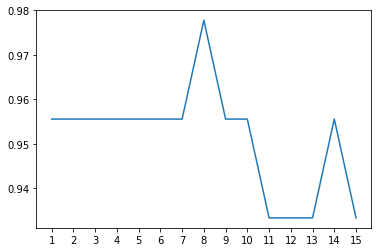

Above is the graph showing the accuracy for the KNN models using different values of n.


In [80]:
a_index=list(range(1,16))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for i in list(range(1,16)):
    model_knn=KNeighborsClassifier(n_neighbors=i) 
    model_knn.fit(train_X,train_y)
    predict_knn=model_knn.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(predict_knn,test_y)))
    
plt.plot(a_index, a)
plt.xticks(x)
plt.show()

print("Above is the graph showing the accuracy for the KNN models using different values of n.")

We used all the features of iris in above models. Now we will use Petals and Sepals <u>seperately</u>.

### Creating Petals And Sepals Training Data

In [42]:
petal=iris_pd[['petal length (cm)','petal width (cm)','Species']]
sepal=iris_pd[['sepal length (cm)','sepal width (cm)','Species']]

In [43]:
train_p,test_p = train_test_split(petal,test_size=0.3,random_state=0)  #petals
train_x_p = train_p[['petal length (cm)','petal width (cm)']]
train_y_p = train_p.Species
test_x_p = test_p[['petal length (cm)','petal width (cm)']]
test_y_p = test_p.Species


train_s,test_s = train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s = train_s[['sepal length (cm)','sepal width (cm)']]
train_y_s = train_s.Species
test_x_s = test_s[['sepal length (cm)','sepal width (cm)']]
test_y_s = test_s.Species

### SVM - Petals & Sepals separately

In [44]:
model_svm = svm.SVC()
model_svm.fit(train_x_p,train_y_p) 
predict_svm = model_svm.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(predict_svm,test_y_p))

model_svm = svm.SVC()
model_svm.fit(train_x_s,train_y_s) 
predict_svm = model_svm.predict(test_x_s) 
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(predict_svm,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


### Logistic Regression - Petals & Sepals separately

In [45]:
model_logreg = LogisticRegression()
model_logreg.fit(train_x_p,train_y_p) 
predict_logreg = model_logreg.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(predict_logreg,test_y_p))

model_logreg = LogisticRegression()
model_logreg.fit(train_x_s,train_y_s) 
predict_logreg = model_logreg.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(predict_logreg,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


### Decision Trees - Petals & Sepals separately

In [46]:
model_DTree = DecisionTreeClassifier()
model_DTree.fit(train_x_p,train_y_p) 
predict_DTree = model_DTree.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(predict_DTree,test_y_p))

model_DTree = DecisionTreeClassifier()
model_DTree.fit(train_x_s,train_y_s) 
predict_DTree = model_DTree.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(predict_DTree,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6444444444444445


### K-Nearest Neighbours - Petals & Sepals separately

In [79]:
model_knn = KNeighborsClassifier(n_neighbors=3) 
model_knn.fit(train_x_p,train_y_p) 
predict_knn = model_knn.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(predict_knn,test_y_p))

model_knn = KNeighborsClassifier(n_neighbors=3) 
model_knn.fit(train_x_s,train_y_s) 
predict_knn = model_knn.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(predict_knn,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


### Observations:  <a name="conclude"></a>

- Using Petals over Sepal for training the data gives a much better accuracy.
- This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was **very low** whereas the correlation between Petal Width and Length was **very high**.

---


### Useful resources:  <a name="resources"></a>

- Scikit Learn Dataset (from Numpy to Pandas): https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset
- Best colour combinations to use: https://www.tableau.com/en-gb/about/blog/2016/4/examining-data-viz-rules-dont-use-red-green-together-53463-0

- Model Accuracy, Precision, Recall, F1-Score: https://medium.com/@kennymiyasato/classification-report-precision-recall-f1-score-accuracy-16a245a437a5
- Model Accuracy, Confusion Matrix, ROC curve: https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/
- Model Selection: Accuracy, Precision, Recall or F1?: https://koopingshung.com/blog/machine-learning-model-selection-accuracy-precision-recall-f1/
- Simple guide to confusion matrix terminology: https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

- Support Vector Machine (SVM): https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/
- Logistic Regression: https://machinelearningmastery.com/logistic-regression-for-machine-learning/
- Logistic Regression: https://christophm.github.io/interpretable-ml-book/logistic.html
- Decision Trees: https://scikit-learn.org/stable/modules/tree.html
- K-Nearest Neighbors: https://medium.com/capital-one-tech/k-nearest-neighbors-knn-algorithm-for-machine-learning-e883219c8f26



---

>### Thank you for reading =)